Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3333 - loss: 1.0914
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6667 - loss: 1.0262
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6667 - loss: 0.6067
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 1.0000 - loss: 0.4229
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 1.0000 - loss: 0.2830
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 1.0000 - loss: 0.1570
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 1.0000 - loss: 0.0769
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 1.0000 - loss: 0.0326
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 1.0000 - loss: 0.0126
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 1.0000 - loss: 0.0045


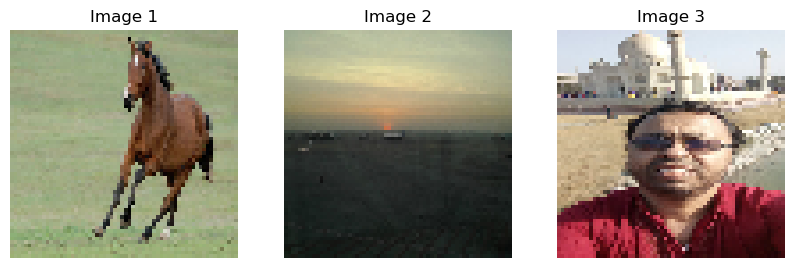

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax') 
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

image_paths = [
    "C:/Users/ngtrd/Desktop/Sandipan_Dey_2018_Sample_Images/images/horse.jpg",
    "C:/Users/ngtrd/Desktop/Sandipan_Dey_2018_Sample_Images/images/aero.jpg",
    "C:/Users/ngtrd/Desktop/Sandipan_Dey_2018_Sample_Images/images/me4.jpg"
]
images = []
labels = []

for i, image_path in enumerate(image_paths):
    img = image.load_img(image_path, target_size=(64, 64)) 
    img_array = image.img_to_array(img) / 255.0 
    images.append(img_array)
    labels.append(i) 

X = np.array(images)
y = np.array(labels)

y = tf.keras.utils.to_categorical(y, 3)

model.fit(X, y, epochs=10, batch_size=3)

plt.figure(figsize=(10, 10))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(X[i])
    plt.title(f"Image {i+1}")
    plt.axis('off')

plt.show()